In [24]:
# importing libraries
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
# loading data
migration_dataset = pd.read_csv("./data/SI/migration_si.csv")
mtd_dataset = pd.read_csv("./data/SI/mother_tongue_diversity_si.csv")
occupation_dataset = pd.read_csv("./data/SI/occupation_si.csv")
religion_dataset = pd.read_csv("./data/SI/religion_si.csv")

In [6]:
# preserving only state and SDI
migration_dataset = migration_dataset[['state', 'migration_p_ln_p']]
religion_dataset = religion_dataset[['state', 'religion_p_ln_p']]
occupation_dataset = occupation_dataset[['state', 'occupation_p_ln_p']]
mtd_dataset = mtd_dataset[['state', 'mtd_p_ln_p']]

In [7]:
# checking the shape of each dataset
migration_dataset.shape

(35, 2)

In [8]:
mtd_dataset.shape

(35, 2)

In [9]:
occupation_dataset.shape

(35, 2)

In [10]:
religion_dataset.shape

(35, 2)

In [11]:
# concatenating all data frames
si_table = pd.DataFrame()
si_table['state'] = occupation_dataset['state']
si_table['occupation_p_ln_p'] = occupation_dataset['occupation_p_ln_p']
si_table['religion_p_ln_p'] = religion_dataset['religion_p_ln_p']
si_table['mtd_p_ln_p'] = mtd_dataset['mtd_p_ln_p']
si_table['migration_p_ln_p'] = migration_dataset['migration_p_ln_p']
si_table.head()

,state,occupation_p_ln_p,religion_p_ln_p,mtd_p_ln_p,migration_p_ln_p
0,ANDAMAN & NICOBAR ISLANDS,3.184329,0.817929,1.981272,2.238738
1,ANDHRA PRADESH,3.151894,0.399206,0.700206,2.308698
2,ARUNACHAL PRADESH,3.024820,1.146343,2.387618,1.639825
3,ASSAM,2.958778,0.810371,1.570991,2.507351
4,BIHAR,2.807725,0.469847,0.747326,1.901895


In [12]:
# calculation of cultural diversity = average of other diversities
si_table['cultural_diversity'] = si_table[['occupation_p_ln_p', 'migration_p_ln_p', 'mtd_p_ln_p', 'religion_p_ln_p']].mean(axis=1)
si_table.head()

,state,occupation_p_ln_p,religion_p_ln_p,mtd_p_ln_p,migration_p_ln_p,cultural_diversity
0,ANDAMAN & NICOBAR ISLANDS,3.184329,0.817929,1.981272,2.238738,2.055567
1,ANDHRA PRADESH,3.151894,0.399206,0.700206,2.308698,1.640001
2,ARUNACHAL PRADESH,3.024820,1.146343,2.387618,1.639825,2.049651
3,ASSAM,2.958778,0.810371,1.570991,2.507351,1.961873
4,BIHAR,2.807725,0.469847,0.747326,1.901895,1.481698


In [13]:
si_table.to_csv('cultural_diversity_si.csv', index=False)

## Clustering states based on diversity indices

In [19]:
# PCA object
pca = PCA(n_components=2)

In [20]:
# # Transformation
# components = pca.fit_transform(
#     StandardScaler().fit_transform(
#         si_table[['occupation_p_ln_p', 'migration_p_ln_p', 'mtd_p_ln_p', 'religion_p_ln_p']]
#     )
# )
# data = pd.DataFrame(components, columns=['x', 'y'])

# Transformation
components = pca.fit_transform(
    si_table[['occupation_p_ln_p', 'migration_p_ln_p', 'mtd_p_ln_p', 'religion_p_ln_p']]
)
data = pd.DataFrame(components, columns=['x', 'y'])

<AxesSubplot:xlabel='x', ylabel='y'>

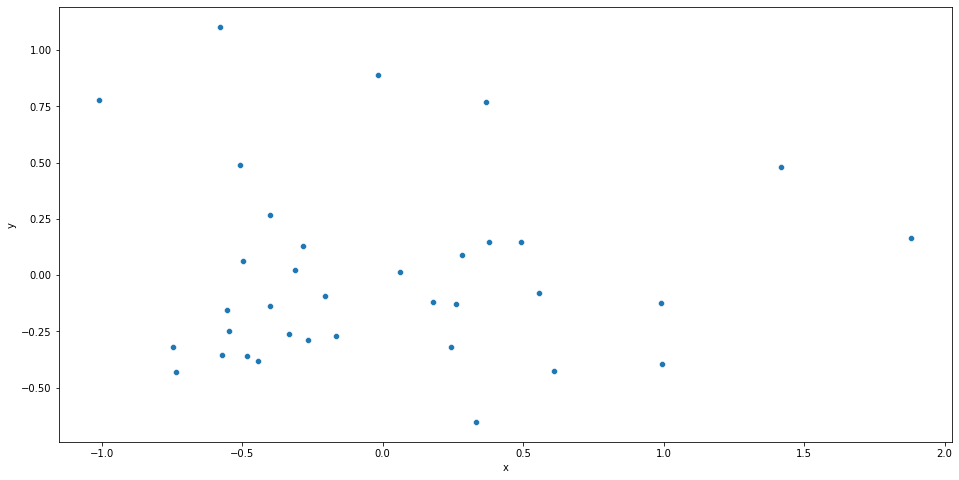

In [21]:
# plotting components
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='x', y='y')

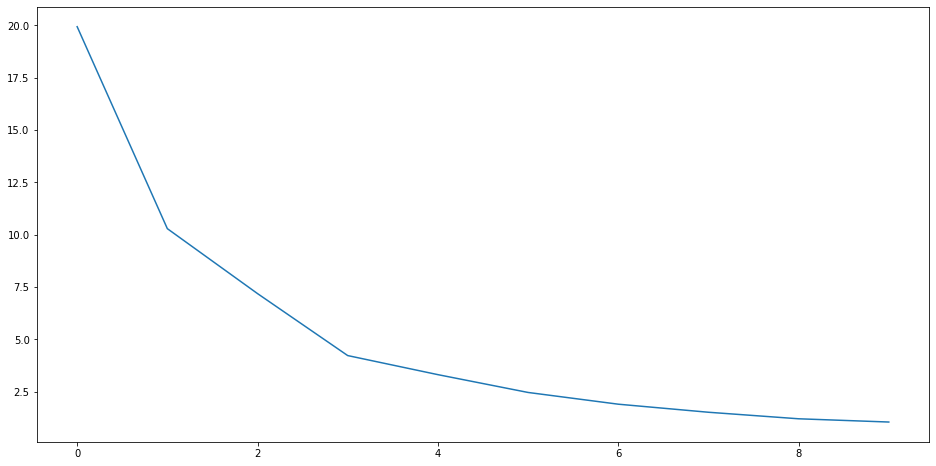

In [26]:
# Finding the optimal cluster
initias = []
for n in range(1, 11):
    c = KMeans(n)
    c.fit_transform(components)
    initias.append(c.inertia_)
    
plt.figure(figsize=(16, 8))
plt.plot(initias)

In [27]:
# Clustering based on the above result
cluster = KMeans(3)
output = cluster.fit_transform(components)
data['class'] = cluster.labels_

Text(0.5, 1.0, 'Clusterig of states based on their index')

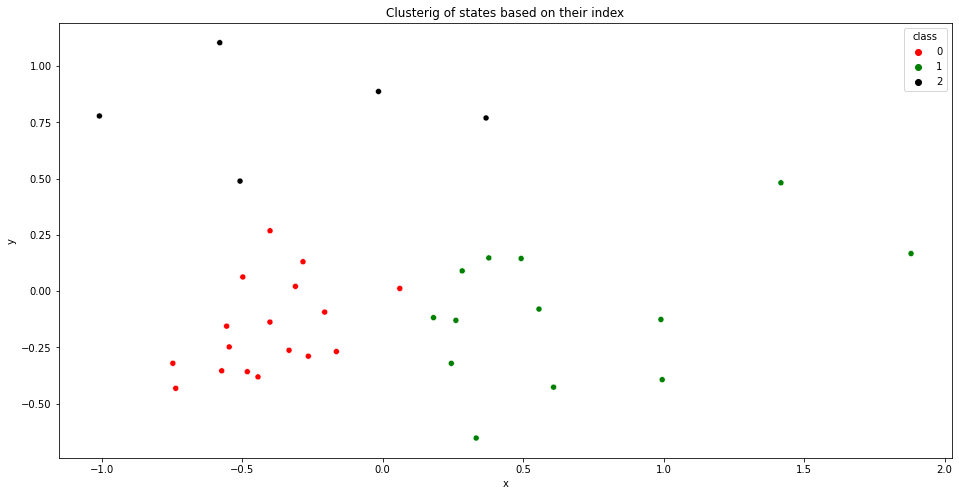

In [28]:
# Visualizing clusters
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='x', y='y', hue='class', palette=['red', 'green', 'black'])
plt.title("Clusterig of states based on their index")

In [29]:
# Visualizing classes on a bar chart
temp_data = si_table.copy()
temp_data['class'] = data['class']
temp_data.head()

,state,occupation_p_ln_p,religion_p_ln_p,mtd_p_ln_p,migration_p_ln_p,cultural_diversity,class
0,ANDAMAN & NICOBAR ISLANDS,3.184329,0.817929,1.981272,2.238738,2.055567,1
1,ANDHRA PRADESH,3.151894,0.399206,0.700206,2.308698,1.640001,0
2,ARUNACHAL PRADESH,3.024820,1.146343,2.387618,1.639825,2.049651,1
3,ASSAM,2.958778,0.810371,1.570991,2.507351,1.961873,1
4,BIHAR,2.807725,0.469847,0.747326,1.901895,1.481698,0


<AxesSubplot:xlabel='state', ylabel='cultural_diversity'>

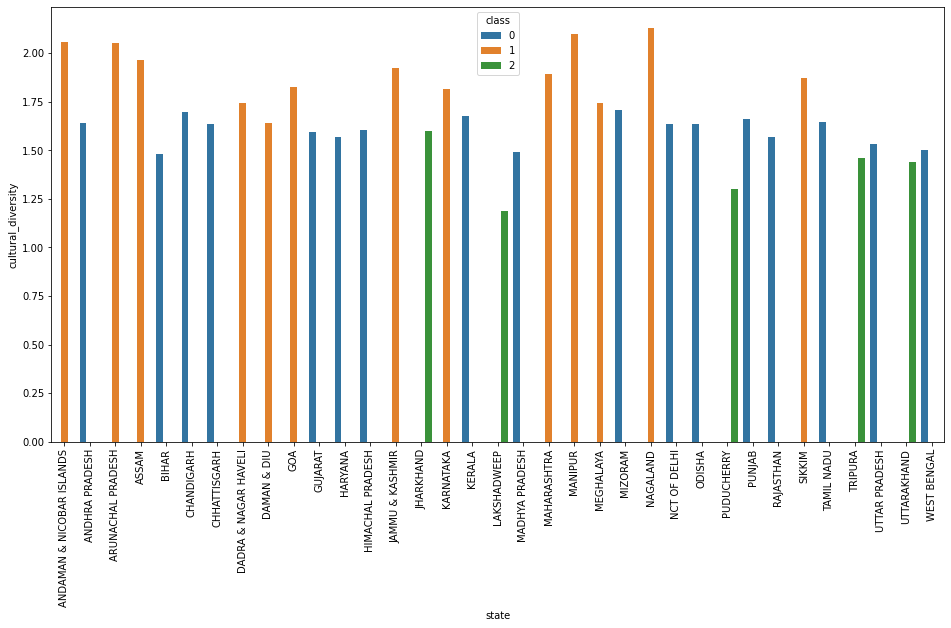

In [30]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.barplot(data=temp_data, x='state', y='cultural_diversity', hue='class')

# Future work - Cultural diversity as a PCA of other diversity indices (dropped for now)